<a href="https://colab.research.google.com/github/TanveerAman/LetsGrowMore/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/TanveerAman/LetsGrowMore/main/iris_flower_classification_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
#adding column names
columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df.columns = columns

analyzing data

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
#checking for null values
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [7]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df["class"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

data visualization

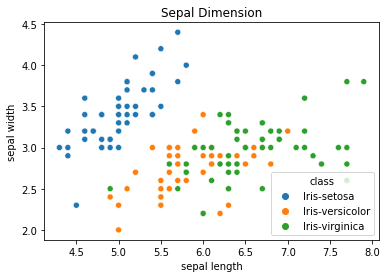

In [9]:
sns.scatterplot(x = df['sepal length'], y = df['sepal width'], hue = df['class'])
plt.title("Sepal Dimension")
plt.show()

In [10]:
len(df["sepal length"].value_counts())

35

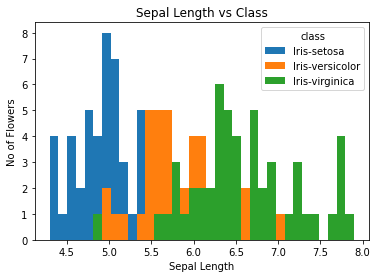

In [11]:
df.pivot(columns='class', values='sepal length').plot.hist(bins=35)
plt.title("Sepal Length vs Class")
plt.xlabel("Sepal Length")
plt.ylabel("No of Flowers")
plt.show()

In [12]:
len(df["sepal width"].value_counts())

23

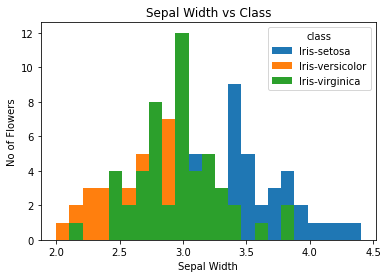

In [13]:
df.pivot(columns='class', values='sepal width').plot.hist(bins=23)
plt.title("Sepal Width vs Class")
plt.xlabel("Sepal Width")
plt.ylabel("No of Flowers")
plt.show()

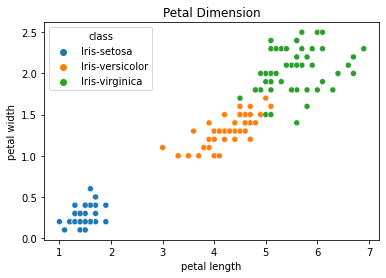

In [14]:
sns.scatterplot(x = df['petal length'], y = df['petal width'], hue = df['class'])
plt.title("Petal Dimension")
plt.show()

In [15]:
len(df["petal length"].value_counts())

43

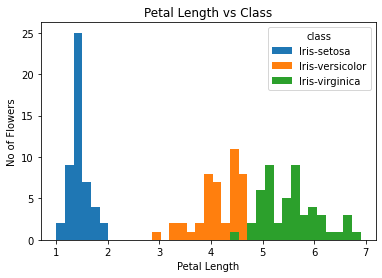

In [16]:
df.pivot(columns='class', values='petal length').plot.hist(bins=35)
plt.title("Petal Length vs Class")
plt.xlabel("Petal Length")
plt.ylabel("No of Flowers")
plt.show()

In [17]:
len(df["petal width"].value_counts())

22

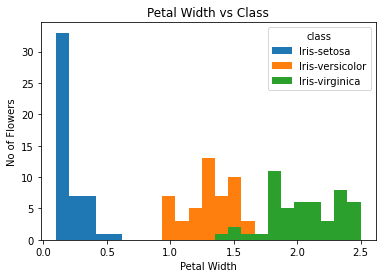

In [18]:
df.pivot(columns='class', values='petal width').plot.hist(bins=23)
plt.title("Petal Width vs Class")
plt.xlabel("Petal Width")
plt.ylabel("No of Flowers")
plt.show()

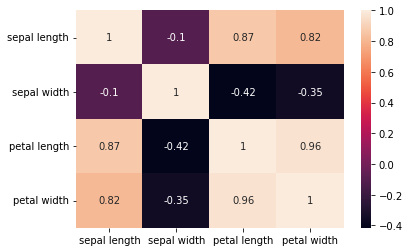

In [19]:
sns.heatmap(df.corr(), annot = True)
plt.show()

creating model

In [20]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', multi_class='auto')
log_reg.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [22]:
y_pred = log_reg.predict(x_test)

In [23]:
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [24]:
result = np.concatenate((y_pred.reshape(y_pred.size, 1), y_test.reshape(y_test.size, 1)), axis=1)
result.shape

(30, 2)

In [25]:
result

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'

In [26]:
result = pd.DataFrame(result)
heading=['y_pred', 'y_test']
result.columns = heading
result

,y_pred,y_test
0,Iris-virginica,Iris-virginica
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor
